## EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
sns.set_style("white")
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
df = pd.read_csv("PimaDiabetes.csv")
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
info=pd.DataFrame(df.dtypes).T.rename(index={0:'Data type'})
info=info.append(pd.DataFrame(df.shape[0] - df.isna().sum()).T.rename(index={0:'Non null values count'}))
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Data type,int64,int64,int64,int64,int64,float64,float64,int64,int64
Non null values count,750,750,750,750,750,750,750,750,750


In [5]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


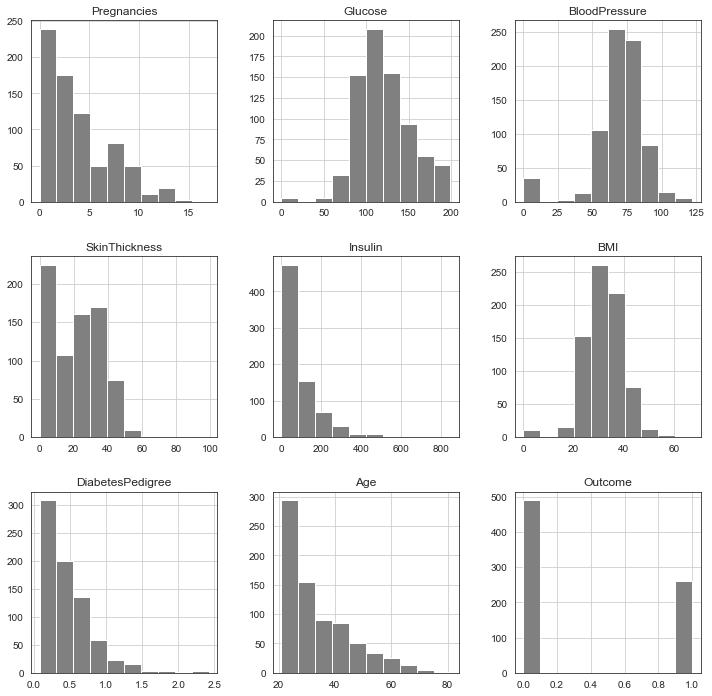

In [6]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,12), color = 'Grey')
plt.show()

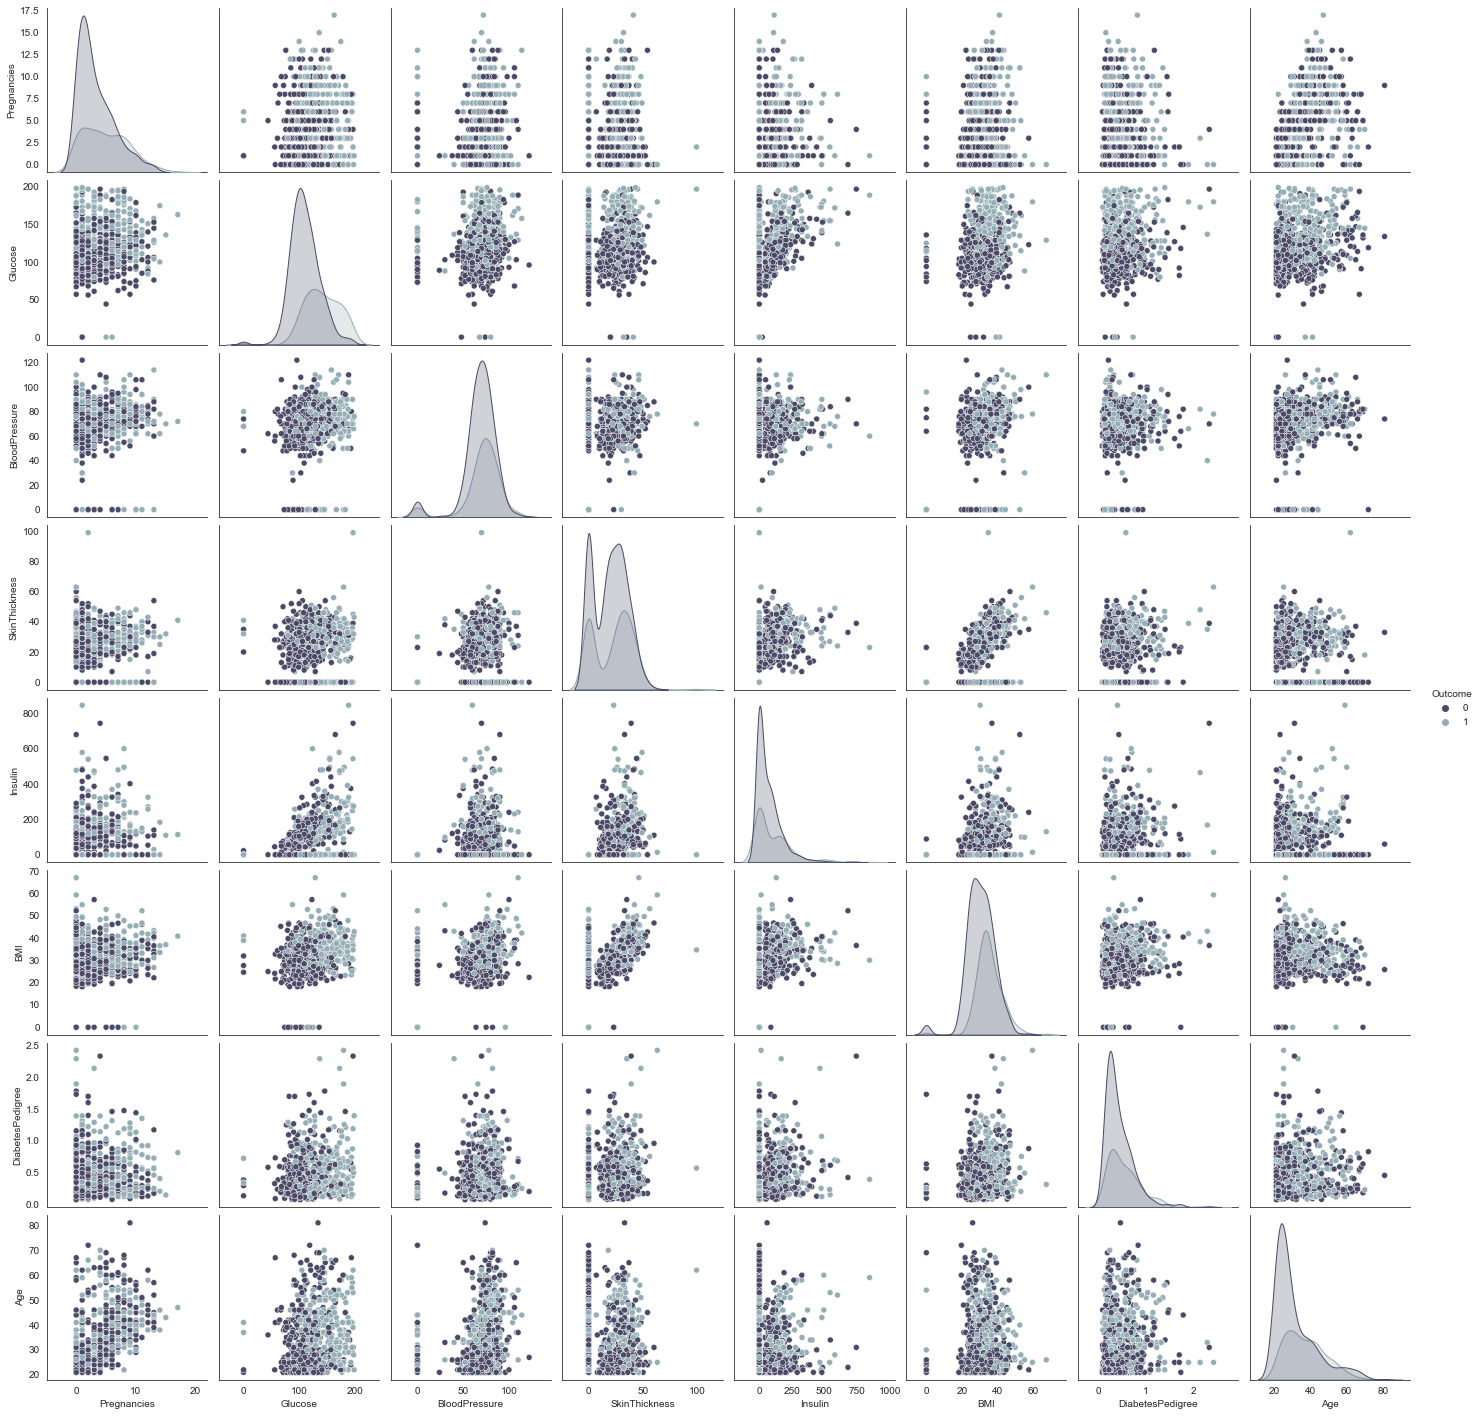

In [7]:
sns.pairplot(df, hue='Outcome', palette='bone')

There's no way a living person has 0 BloodPressure, Glucose, SkinThickness, Insulin, and BMI. So any records with 0 value in these columns will be replaced with np.null.

In [8]:
replacements = {0: np.nan}
df['SkinThickness'].replace(replacements, inplace=True)
df['Glucose'].replace(replacements, inplace=True)
df['BloodPressure'].replace(replacements, inplace=True)
df['Insulin'].replace(replacements, inplace=True)
df['BMI'].replace(replacements, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
info=pd.DataFrame(df.dtypes).T.rename(index={0:'Data type'})
info=info.append(pd.DataFrame(df.shape[0] - df.isna().sum()).T.rename(index={0:'Non null values count'}))
info

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Data type,int64,float64,float64,float64,float64,float64,float64,int64,int64
Non null values count,750,745,715,529,388,739,750,750,750


In [10]:
pd.DataFrame([{'Pregnancies': df['Pregnancies'].nunique(),    
               'Glucose': df['Glucose'].nunique(),
               'BloodPressure': df['BloodPressure'].nunique(),  
               'BMI': df['BMI'].nunique(),
               'DiabetesPedigree': df['DiabetesPedigree'].nunique(),
               'Age': df['Age'].nunique()
              }], columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigree', 'Age'], index = ['Number of unique'])

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
Number of unique,17,134,46,247,512,52


Labeled with 1:  490
Labeled with 0f 0 :  260


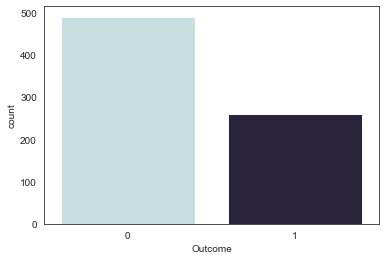

In [11]:
import seaborn as sns 

y = df['Outcome']

ax = sns.countplot(y,label="Count", palette='ch:start=.2,rot=-.3')       # M = 212, B = 357
Y, N = y.value_counts()
print('Labeled with 1: ',Y)
print('Labeled with 0f 0 : ',N)

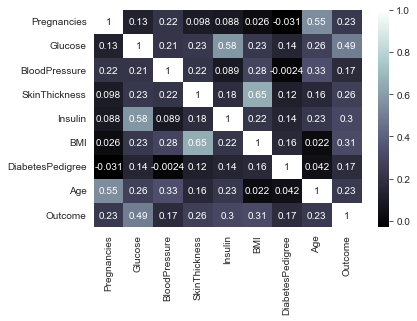

In [12]:
import seaborn as sns
ax = sns.heatmap(df.corr(), annot=True, cmap='bone')

In [13]:
grouped_ = df.groupby(["Outcome"]).mean().reset_index()
grouped_

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,3.281633,110.685832,70.866242,27.118980,130.823077,30.853222,0.432278,31.181633
1,1,4.903846,142.050388,75.241803,32.920455,205.234375,35.383333,0.551315,36.907692


In [14]:
y = df.Outcome

In [15]:
x = df.drop('Outcome', axis = 1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46
746,1,147.0,94.0,41.0,NaN,49.3,0.358,27
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36


In [16]:
import matplotlib.pyplot as plt

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_n_2.iloc[:,0:8],y],axis=1)

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,0.639746,0.865768,-0.028911,0.566491,NaN,0.167611,0.462051,1.437656,1
1,-0.843896,-1.196180,-0.511518,-0.004679,NaN,-0.839298,-0.368976,-0.185045,0
2,1.233203,2.011294,-0.672387,NaN,NaN,-1.313984,0.597544,-0.099640,1
3,-0.843896,-1.065263,-0.511518,-0.575849,-0.520123,-0.623532,-0.922993,-1.039098,0
4,-1.140624,0.505745,-2.602813,0.566491,0.107030,1.534130,5.463263,-0.014234,1
...,...,...,...,...,...,...,...,...,...
745,2.420117,-0.705240,0.936302,0.376101,-0.426898,-0.350228,0.043527,1.096035,0
746,-0.843896,0.833038,1.740646,1.137661,NaN,2.425963,-0.347899,-0.526666,1
747,-0.843896,-1.327097,0.131957,1.137661,-0.833700,1.994431,1.874193,-0.099640,0
748,-0.250439,2.142211,-0.189780,-0.671044,0.378232,0.570374,-0.197351,0.241982,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigree'),
  Text(7, 0, 'Age')])

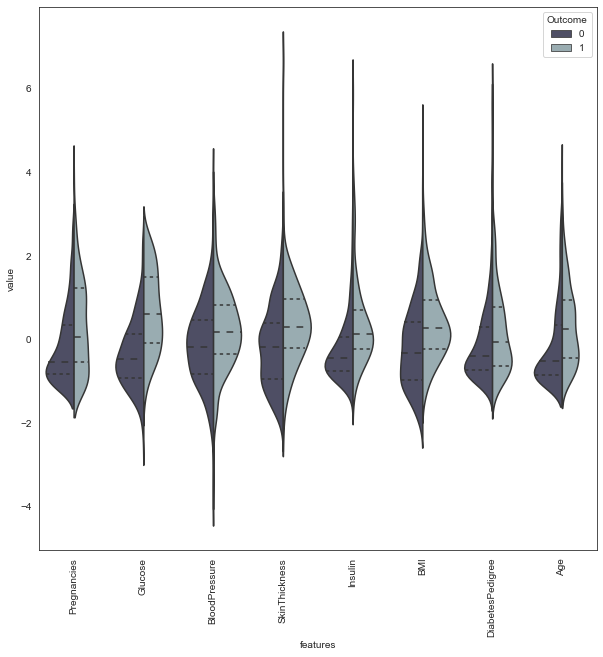

In [18]:
data = pd.melt(data,id_vars="Outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Outcome", data=data,split=True, inner="quart", palette='bone')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigree'),
  Text(7, 0, 'Age')])

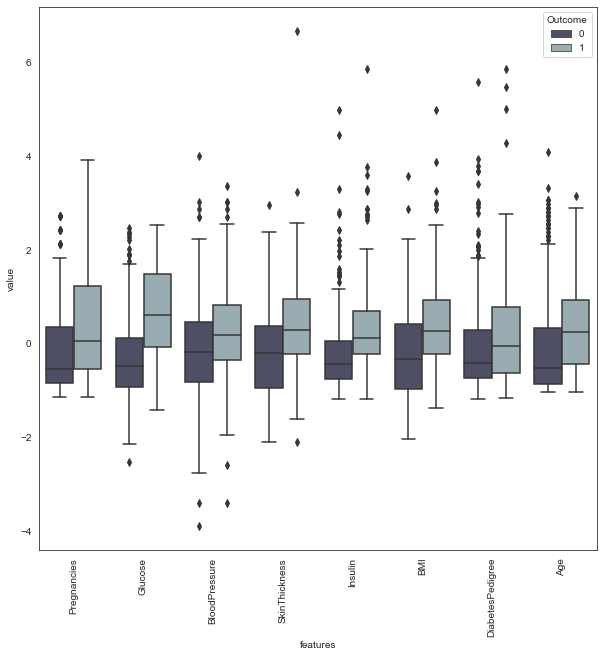

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="Outcome", data=data, palette='bone')
plt.xticks(rotation=90)

In [20]:
df['ThreeOrMoreKids'] = df['Pregnancies'] >= 3
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMoreKids
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,True
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,False
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False
...,...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105.0,30.0,0.488,46,0,True
746,1,147.0,94.0,41.0,NaN,49.3,0.358,27,1,False
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0,False
748,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1,True


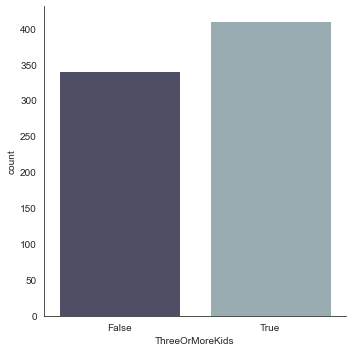

In [21]:
sns.catplot(data=df, x="ThreeOrMoreKids", kind="count", palette="bone")

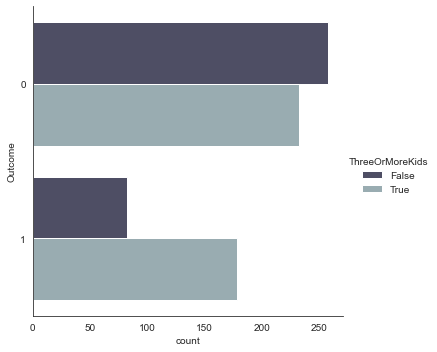

In [22]:
sns.catplot(data=df, y="Outcome", hue="ThreeOrMoreKids", kind="count",palette="bone", orient="h")

## Single Predictor

In [23]:
df = df.drop(['SkinThickness', 'Insulin'],axis=1)
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age,Outcome,ThreeOrMoreKids
0,6,148.0,72.0,33.6,0.627,50,1,True
1,1,85.0,66.0,26.6,0.351,31,0,False
2,8,183.0,64.0,23.3,0.672,32,1,True
3,1,89.0,66.0,28.1,0.167,21,0,False
4,0,137.0,40.0,43.1,2.288,33,1,False
...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,30.0,0.488,46,0,True
746,1,147.0,94.0,49.3,0.358,27,1,False
747,1,81.0,74.0,46.3,1.096,32,0,False
748,3,187.0,70.0,36.4,0.408,36,1,True


In [24]:
x = df['ThreeOrMoreKids'].values
y = df['Outcome'].values

In [25]:
df_test = pd.read_csv('ToPredict.csv')

In [26]:
df_test['ThreeOrMoreKids'] = df_test['Pregnancies'] >= 3
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,ThreeOrMoreKids
0,4,136,70,0,0,31.2,1.182,22,True
1,1,121,78,39,74,39.0,0.261,28,False
2,3,108,62,24,0,26.0,0.223,25,True
3,0,181,88,44,510,43.3,0.222,26,False
4,8,154,78,32,0,32.4,0.443,45,True


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

model = LogisticRegression().fit(x.reshape(-1,1), y)
model1 = LinearRegression().fit(x.reshape(-1,1), y)

In [28]:
model.predict(x.reshape(-1,1))

print("Intercept: ", model1.intercept_)
print("Coefficients:")
list(zip(x, model1.coef_))

Intercept:  0.23343848580441645
Coefficients:


[(True, 0.19586742679198452)]

In [29]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x, model.coef_[0]))

Intercept:  [-1.17355331]
Coefficients:


[(True, 0.8796345331633937)]

In [30]:
yh = model.predict_proba(x.reshape(-1,1))

In [31]:
yh

array([[0.57295524, 0.42704476],
       [0.76378669, 0.23621331],
       [0.57295524, 0.42704476],
       ...,
       [0.76378669, 0.23621331],
       [0.57295524, 0.42704476],
       [0.57295524, 0.42704476]])

In [32]:
y_pred = model.predict(df_test['ThreeOrMoreKids'].values.reshape(-1,1))
print("Predicted value of x_pred = {} are y_pred = {}".format(df_test['ThreeOrMoreKids'].values, y_pred))

Predicted value of x_pred = [ True False  True False  True] are y_pred = [0 0 0 0 0]


In [33]:
y_p = model1.predict(df_test['ThreeOrMoreKids'].values.reshape(-1,1))
print("The success (y = 1) probability of x_pred = {} are {}".format(df_test['ThreeOrMoreKids'].values, y_p))

The success (y = 1) probability of x_pred = [ True False  True False  True] are [0.42930591 0.23343849 0.42930591 0.23343849 0.42930591]


In [34]:
P_AB = len(df[(df['Outcome'] == 1) & (df['ThreeOrMoreKids'] == True)])
P_B = len(df[df['ThreeOrMoreKids'] == 1])

print(P_B)

P = P_AB/P_B
P

389


0.42930591259640105

In [35]:
P_AB2 = len(df[(df['Outcome'] == 1) & (df['ThreeOrMoreKids'] == False)])
P_B2 = len(df[df['ThreeOrMoreKids'] == 0])

print(P_B2)
P2 = P_AB2/P_B2
P2

317


0.2334384858044164

In [36]:
P_AB3 = len(df[(df['Outcome'] == 0) & (df['ThreeOrMoreKids'] == True)])
P_B3 = len(df[df['ThreeOrMoreKids'] == 1])

P3 = P_AB3/P_B3
P3

0.570694087403599

In [37]:
P_AB4 = len(df[(df['Outcome'] == 0) & (df['ThreeOrMoreKids'] == False)])
P_B4 = len(df[df['ThreeOrMoreKids'] == 0])

P4 = P_AB4/P_B4
P4

0.7665615141955836

## Regression Model

In [38]:
x = df.drop(['Outcome', 'ThreeOrMoreKids'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33
...,...,...,...,...,...,...
745,12,100.0,84.0,30.0,0.488,46
746,1,147.0,94.0,49.3,0.358,27
747,1,81.0,74.0,46.3,1.096,32
748,3,187.0,70.0,36.4,0.408,36


In [39]:
X = x.values
y = df['Outcome'].values

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)
decision_tree = DecisionTreeClassifier(random_state=3)
decision_tree = decision_tree.fit(X_train, y_train)
yhat = decision_tree.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

#tree.plot_tree(decision_tree, feature_names=x.columns)

Accuracy: 0.722


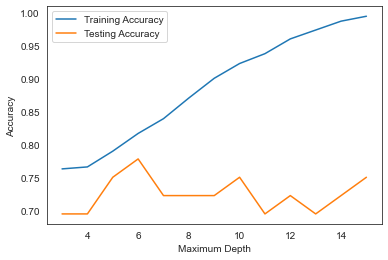

In [41]:
import numpy as np
import matplotlib.pyplot as plt

train_accs = [] # Log training errors for each model
test_accs = [] # Log testing errors for each model

for max_d in range(2,15):
    dtc = DecisionTreeClassifier(max_depth=max_d, random_state=42) 
    dtc.fit(X_train, y_train)
    yhat_train = dtc.predict(X_train)
    yhat_test = dtc.predict(X_test)
    train_accs.append(accuracy_score(y_train, yhat_train))
    test_accs.append(accuracy_score(y_test, yhat_test))

x_axs = np.arange(2,15) + 1 # Create domain for plot
plt.plot(x_axs, train_accs, label='Training Accuracy') # Plot training error over domain
plt.plot(x_axs, test_accs, label='Testing Accuracy') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
yhat = gnb.predict(X_test)
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.722


In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
y_hat = lr.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print('Accuracy: %.3f' % acc)
print(lr.score(X_train,y_train))

Accuracy: 0.778
0.7686567164179104


In [44]:
df_test = df_test.drop(['SkinThickness', 'Insulin', 'ThreeOrMoreKids'], axis=1)
df_test

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigree,Age
0,4,136,70,31.2,1.182,22
1,1,121,78,39.0,0.261,28
2,3,108,62,26.0,0.223,25
3,0,181,88,43.3,0.222,26
4,8,154,78,32.4,0.443,45


In [45]:
y_pred = lr.predict(df_test)
y_pred

array([0, 0, 0, 1, 1], dtype=int64)

In [46]:
y_dt = decision_tree.predict(df_test)
y_dt

array([0, 0, 0, 1, 1], dtype=int64)

In [47]:
print("Intercept: ", lr.intercept_)
print("Coefficients:")
list(zip(x.columns, lr.coef_[0]))

Intercept:  [-8.74258809]
Coefficients:


[('Pregnancies', 0.1331020790380942),
 ('Glucose', 0.03453081576255286),
 ('BloodPressure', -0.010957271683026959),
 ('BMI', 0.09221054924977266),
 ('DiabetesPedigree', 0.8219459656281799),
 ('Age', 0.015855391935712195)]

In [48]:
y_prob = lr.predict_proba(X_test)
y_prob

array([[0.91382855, 0.08617145],
       [0.49064055, 0.50935945],
       [0.95332905, 0.04667095],
       [0.79012976, 0.20987024],
       [0.19596984, 0.80403016],
       [0.92954747, 0.07045253],
       [0.31534886, 0.68465114],
       [0.40595865, 0.59404135],
       [0.88293547, 0.11706453],
       [0.85248561, 0.14751439],
       [0.67536593, 0.32463407],
       [0.82226315, 0.17773685],
       [0.22094396, 0.77905604],
       [0.21493286, 0.78506714],
       [0.5321736 , 0.4678264 ],
       [0.83676646, 0.16323354],
       [0.94018618, 0.05981382],
       [0.88707353, 0.11292647],
       [0.16349292, 0.83650708],
       [0.54676848, 0.45323152],
       [0.90232352, 0.09767648],
       [0.73065691, 0.26934309],
       [0.93315433, 0.06684567],
       [0.26354912, 0.73645088],
       [0.64541512, 0.35458488],
       [0.90840058, 0.09159942],
       [0.86955702, 0.13044298],
       [0.61341584, 0.38658416],
       [0.77256084, 0.22743916],
       [0.64687095, 0.35312905],
       [0.

In [49]:
y_hat

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
mlr = LinearRegression().fit(X_train, y_train)
y_hat = mlr.predict(X_test)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x.columns, mlr.coef_))

Intercept:  -0.970947359795711
Coefficients:


[('Pregnancies', 0.022151701640166728),
 ('Glucose', 0.006045154685302401),
 ('BloodPressure', -0.0014274900465371337),
 ('BMI', 0.013752698163034526),
 ('DiabetesPedigree', 0.13545573073863096),
 ('Age', 0.0025043042275574544)]

In [51]:
y_hat

array([ 8.99174596e-02,  4.87905936e-01, -4.44730946e-04,  2.67364114e-01,
        7.22179809e-01,  4.83091098e-02,  6.29644132e-01,  5.70754867e-01,
        1.60102822e-01,  1.99882009e-01,  3.79834910e-01,  2.46829891e-01,
        7.09883528e-01,  6.92219201e-01,  4.75116642e-01,  1.95208775e-01,
        3.45912396e-02,  1.53960676e-01,  7.57781248e-01,  4.73550851e-01,
        1.30056732e-01,  3.38128056e-01,  6.54456377e-02,  6.60614131e-01,
        3.80713007e-01,  1.18209684e-01,  1.74668925e-01,  4.17004366e-01,
        2.68954119e-01,  4.20114799e-01,  4.88429747e-01,  4.49633203e-01,
       -5.19381281e-02,  2.63547662e-01,  3.38015284e-01,  2.81430881e-01])

In [52]:
print(mlr.score(X_train, y_train))

0.31457678719831805


### Feature Selection

In [53]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_N)

NameError: name 'X_N' is not defined

In [ ]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.140243,0.028679,0.063119,0.011996,-0.003135,0.000473
1,0.188552,-0.005918,0.018411,-0.015025,-0.012475,-0.000308
2,-0.296155,-0.088449,0.027886,-0.047742,0.022819,0.000983
3,0.174249,-0.038225,-0.022409,-0.015347,-0.004030,-0.001235
4,-0.060372,-0.136488,0.075494,0.085358,-0.017799,0.008177


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=x.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Pregnancies,-0.018113,0.106678,0.125555,0.024189,0.985855,0.005667
Glucose,-0.985702,-0.162223,-0.017720,-0.041870,0.002735,-0.001254
BloodPressure,-0.107593,0.776308,-0.576350,-0.231384,-0.006912,0.001979
BMI,-0.051953,0.094530,-0.249319,0.962362,-0.003001,-0.007459
DiabetesPedigree,-0.001491,-0.000715,-0.000254,0.007656,-0.005853,0.999952
Age,-0.117417,0.592211,0.767842,0.133882,-0.167305,-0.001562


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

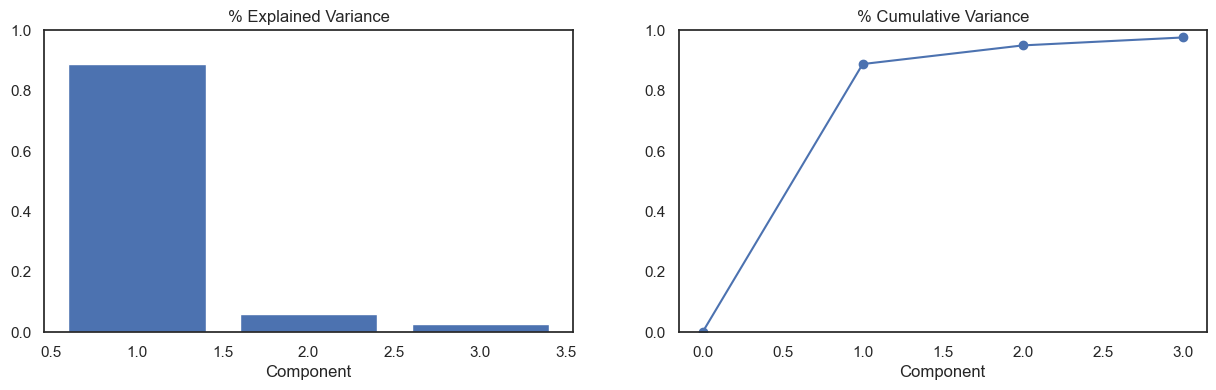

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=15, dpi=100)
    return axs
    
plot_variance(pca)

#### PCA

In [ ]:
df = pd.read_csv("PimaDiabetes.csv")
#replacements = {0: np.nan}
#df['SkinThickness'].replace(replacements, inplace=True)
#df['Glucose'].replace(replacements, inplace=True)
#df['BloodPressure'].replace(replacements, inplace=True)
#f['Insulin'].replace(replacements, inplace=True)
#df['BMI'].replace(replacements, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0
746,1,147,94,41,0,49.3,0.358,27,1
747,1,81,74,41,57,46.3,1.096,32,0
748,3,187,70,22,200,36.4,0.408,36,1


In [ ]:
array = df.values
X = array[:, 0:8]
Y = array[:, 8]

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
print(fit.explained_variance_ratio_)
print(fit.components_)

[0.888 0.062 0.026]
[[-1.947e-03  9.866e-02  1.586e-02  6.064e-02  9.930e-01  1.396e-02
   5.575e-04 -3.356e-03]
 [-2.256e-02 -9.732e-01 -1.377e-01  5.905e-02  9.541e-02 -4.522e-02
  -8.292e-04 -1.374e-01]
 [-2.251e-02  1.393e-01 -9.267e-01 -2.968e-01  2.047e-02 -1.314e-01
  -6.716e-04 -1.246e-01]]


In [ ]:
fit = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(fit.shape[1])]
x = df.drop(['Outcome'], axis=1)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=x.columns,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3
Pregnancies,-0.001947,-0.022558,-0.022508
Glucose,0.098661,-0.973154,0.139302
BloodPressure,0.015859,-0.137664,-0.926699
SkinThickness,0.060639,0.059047,-0.296839
Insulin,0.993039,0.095406,0.020469
BMI,0.013961,-0.045219,-0.131416
DiabetesPedigree,0.000557,-0.000829,-0.000672
Age,-0.003356,-0.137393,-0.124560


<AxesSubplot:xlabel='Principal components', ylabel='Explained variance'>

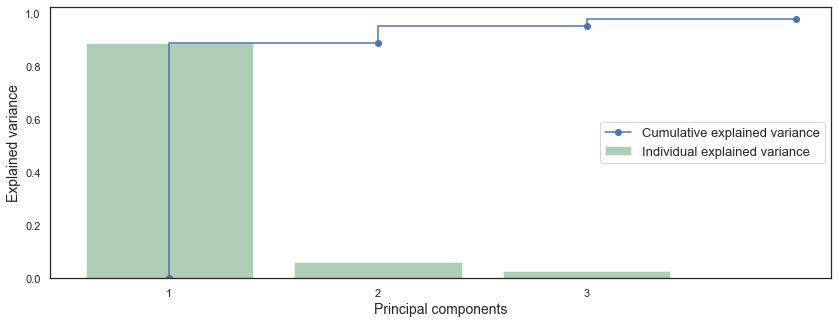

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(figsize=(14,5))
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    sns.barplot(grid, evr, color='g', alpha=0.5, label='Individual explained variance')
    #axs[0].set(
    #    xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    #)
    # Cumulative Variance
    cv = np.cumsum(evr)
    plt.step(np.r_[0, grid], np.r_[0, cv], "o-", label='Cumulative explained variance')
    #axs[1].set(
    #    xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    #)
    # Set up figure
    #fig.set(figwidth=15, dpi=100)
    plt.ylabel('Explained variance', fontsize = 14)
    plt.xlabel('Principal components', fontsize = 14)
    plt.legend(loc='best', fontsize = 13)
    return axs
    
plot_variance(pca)

#### Univariate selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5,:])

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
745,12,100,84,33,105,30.0,0.488,46,0
746,1,147,94,41,0,49.3,0.358,27,1
747,1,81,74,41,57,46.3,1.096,32,0
748,3,187,70,22,200,36.4,0.408,36,1


1,2,6,8 = pregnancies, glucose, BMI, Age

#### RFE

In [ ]:
from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select = 3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


Pregnancies, Glucose, BMI, DiabetesPedigree